Model Evaluation - Comparing Decision Tree and Logistic Regression

In [1]:
import numpy as np
import pandas as pd


In [15]:
data = pd.read_csv('Diabetes.csv')

In [4]:
data.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [ ]:
# data =data.rename(columns={'Number of times pregnant':'pregnant_count'})
# data =data.rename(columns={'Plasma glucose concentration':'glucose_level'})
# data =data.rename(columns={'Diastolic blood pressure':'BP_level'}) 
# data =data.rename(columns={'Triceps skin fold thickness':'skin_health'})
# data =data.rename(columns={'2-Hour serum insulin':'insulin_level'})
# data =data.rename(columns={'Body mass index':'BMI'}) 
# data =data.rename(columns={'Diabetes pedigree function':'Diabetes'})
# data =data.rename(columns={'Age (years)':'Age'})






In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Outcome                        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [6]:
data.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years)
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
data.isnull().sum()

 Number of times pregnant        0
 Plasma glucose concentration    0
 Diastolic blood pressure        0
 Triceps skin fold thickness     0
 2-Hour serum insulin            0
 Body mass index                 0
 Diabetes pedigree function      0
 Age (years)                     0
Outcome                          0
dtype: int64

In [16]:
Numeric_columns = [' Number of times pregnant',' Plasma glucose concentration',' Diastolic blood pressure',
                   ' Triceps skin fold thickness',' 2-Hour serum insulin',' Body mass index',
                   ' Diabetes pedigree function',' Age (years)']

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

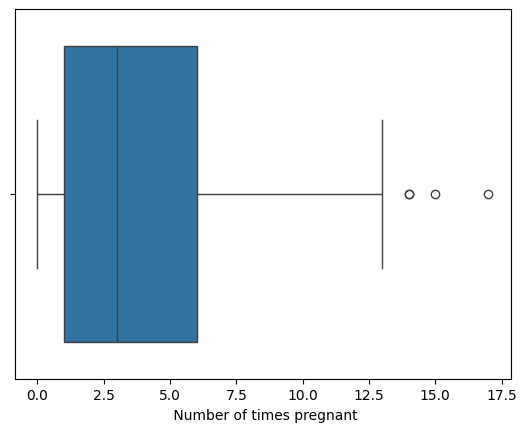

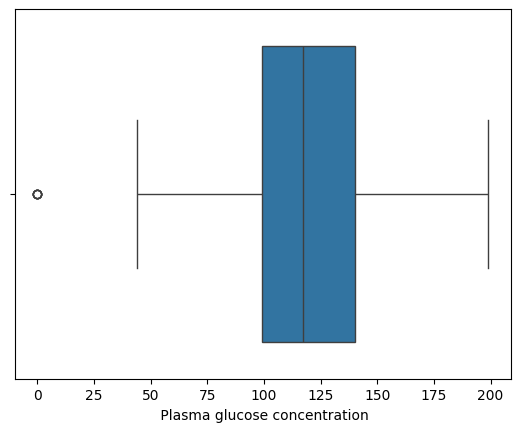

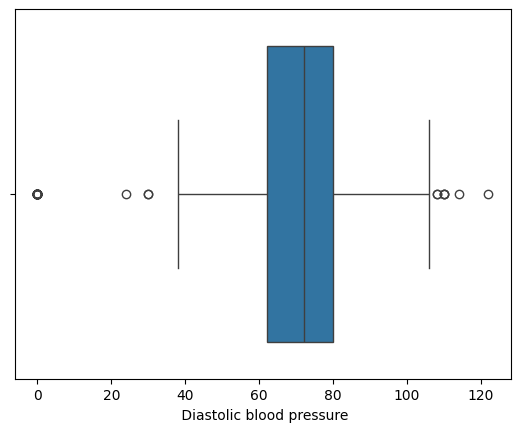

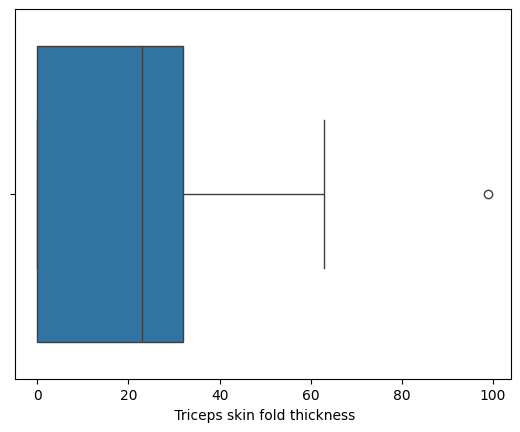

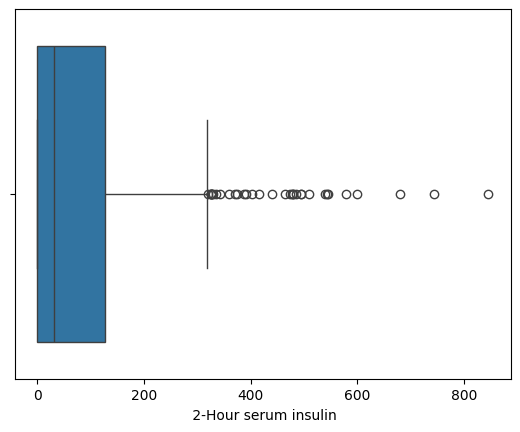

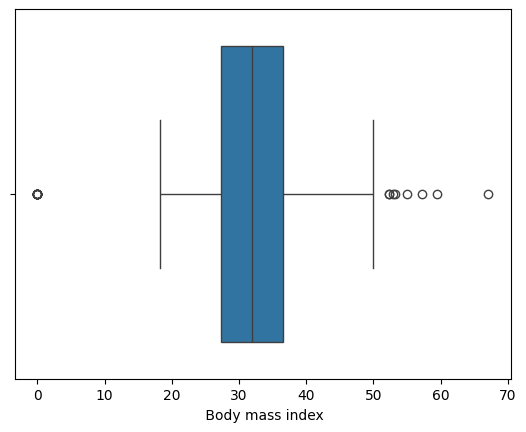

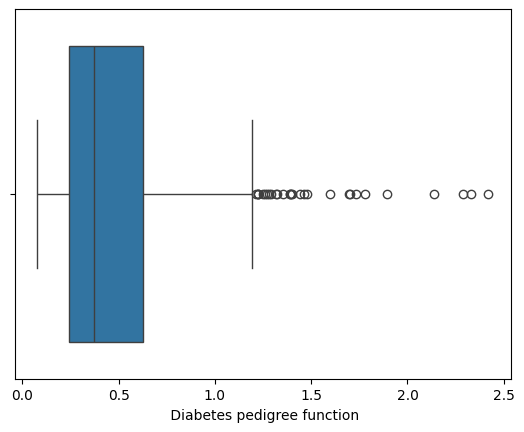

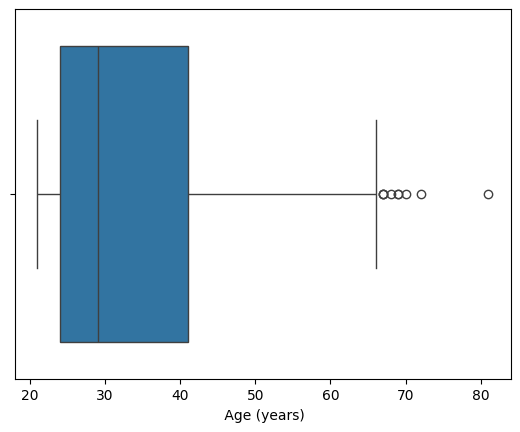

In [18]:

for col1 in Numeric_columns:
    sns.boxplot(data=data,x=col1)
    plt.show()
    

In [19]:
for col2 in Numeric_columns:
    q1 = data[col2].quantile(0.25)
    q3 = data[col2].quantile(0.75)
    
    iqr = q3 - q1
    
    lower_tail = q1 - 1.5 * iqr
    higher_tail = q3 + 1.5 * iqr
    
    med  = data[col2].median()
    
    for i in data[col2]:
        if i < lower_tail or i > higher_tail:
            data[col2] = data[col2].replace(i,med)

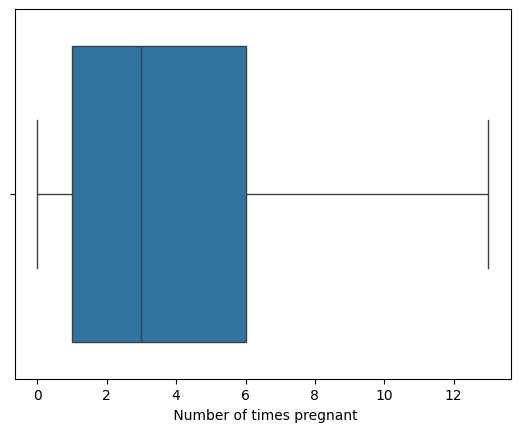

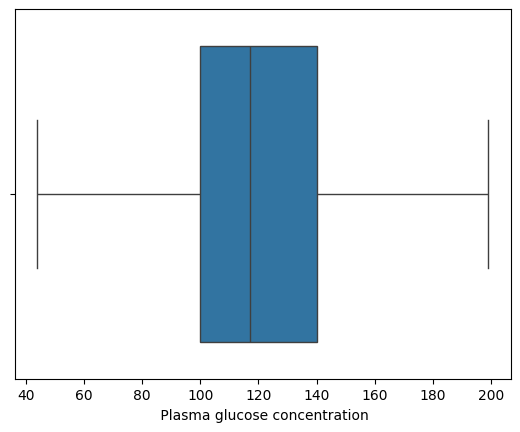

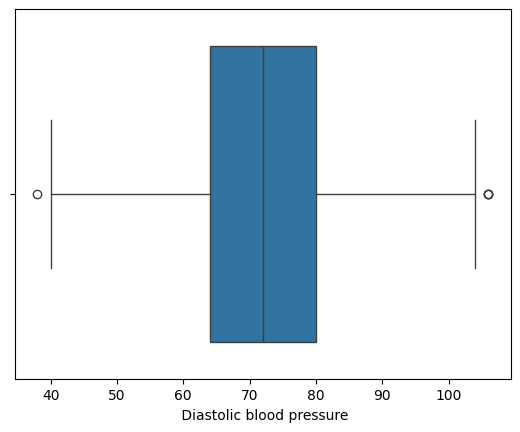

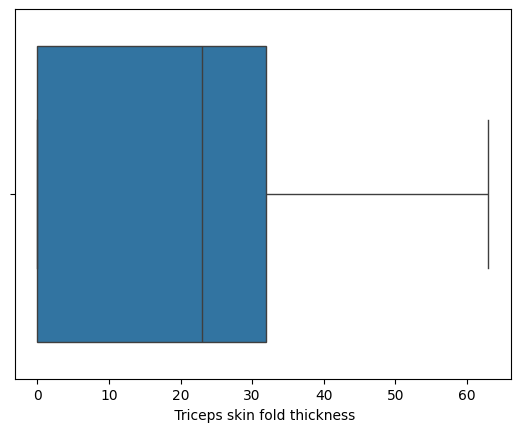

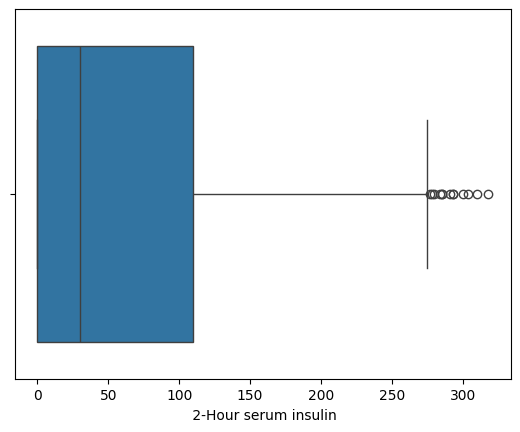

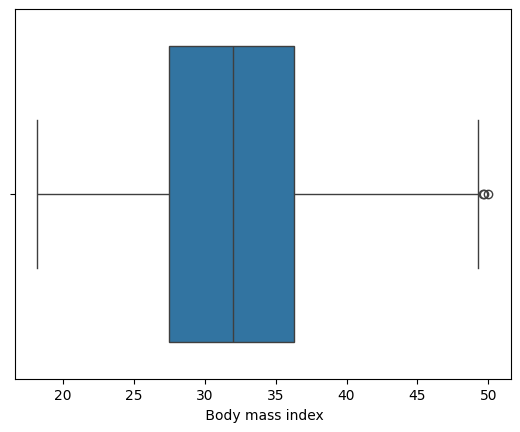

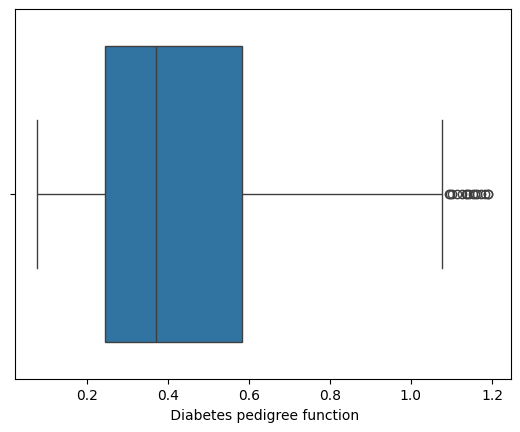

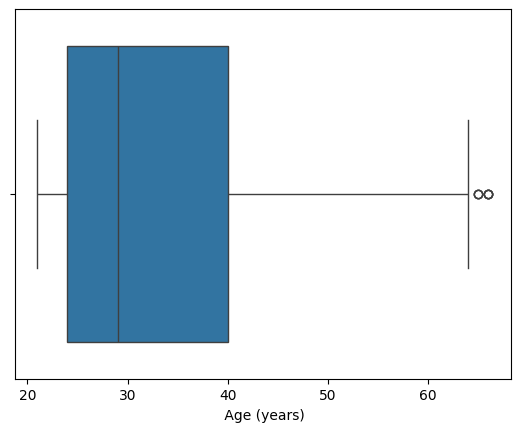

In [20]:
for col1 in Numeric_columns:
    sns.boxplot(data=data,x=col1)
    plt.show()
    

In [89]:
#Apply Encoding

from sklearn.preprocessing import LabelEncoder

In [90]:
le=LabelEncoder()

In [91]:
data['Outcome'] = le.fit_transform(data['Outcome'])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = data.drop('Outcome',axis=1)

In [94]:
y=data['Outcome']

In [95]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=0)

Decision Tree

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
model = DecisionTreeClassifier(random_state=42)

In [98]:
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [99]:
y_pred=model.predict(X_test)

In [100]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,recall_score

In [101]:
decisionTree_accuracy = accuracy_score(y_test,y_pred)
decisionTree_precision = precision_score(y_test,y_pred)
desicion_tree_confusion_matrix = confusion_matrix(y_test,y_pred)
desicion_tree_recall = recall_score(y_test,y_pred)

In [102]:
print(f"Accuracy : {decisionTree_accuracy}")
print(f"Precision : {decisionTree_precision}")
print(f"confusion_matrix : \n{desicion_tree_confusion_matrix}")
print(f"Recall Value {desicion_tree_recall}")

Accuracy : 0.70995670995671
Precision : 0.5636363636363636
confusion_matrix : 
[[133  24]
 [ 43  31]]
Recall Value 0.4189189189189189


In [41]:
#Visulizing the Confusion_matrix

<Axes: >

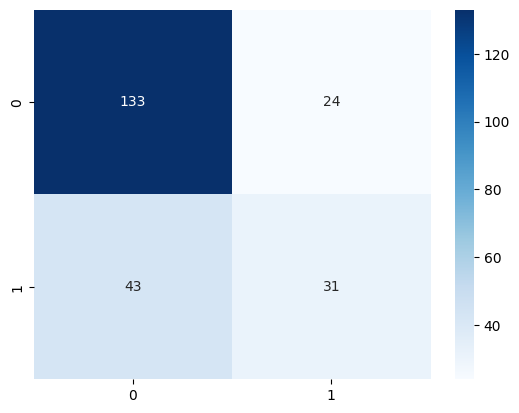

In [46]:
sns.heatmap(desicion_tree_confusion_matrix,annot=True,fmt='d',cmap='Blues')

In [47]:
from sklearn.metrics import roc_curve , auc

In [48]:
fpr , tpr , threshold = roc_curve(y_test,y_pred)

In [49]:
roc_auc = auc(fpr,tpr)

In [54]:
import seaborn as sns

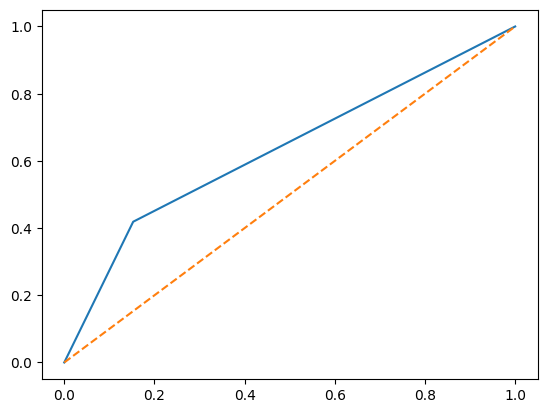

In [81]:
plt.plot(fpr,tpr, label = f'Roc curve :  {roc_auc :.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()



In [60]:
#Logistic Regresssion

In [61]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_Model = LogisticRegression(random_state=42)

In [ ]:
log_Model.fit(X_train,y_train)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [70]:
y_pred_log = Model.predict(X_test)

In [85]:
log_accuracy = accuracy_score(y_test,y_pred_log)
log_precision = precision_score(y_test,y_pred_log)
log_confusion_matrix = confusion_matrix(y_test,y_pred_log)
log_recall = recall_score(y_test,y_pred_log)

In [86]:
print(f"Accuracy : {log_accuracy}")
print(f"Precision : {log_precision}")
print(f"confusion_matrix : \n{log_confusion_matrix}")
print(f"Recall Value {log_recall}")

Accuracy : 0.7619047619047619
Precision : 0.6666666666666666
confusion_matrix : 
[[138  19]
 [ 36  38]]
Recall Value 0.5135135135135135


<Axes: >

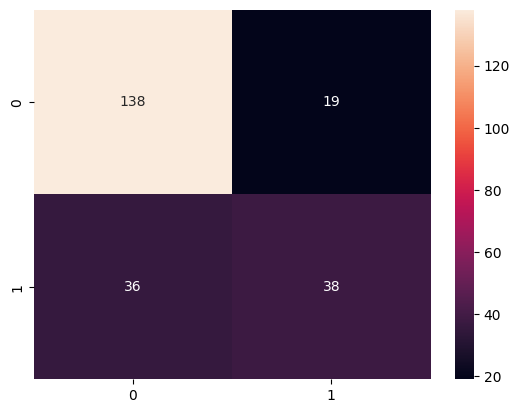

In [75]:
sns.heatmap(log_confusion_matrix,annot=True,fmt='d')

In [78]:
fpr1 , tpr1 , threshold1 = roc_curve(y_test , y_pred_log)

In [79]:
log_auc=auc(fpr1,tpr1)

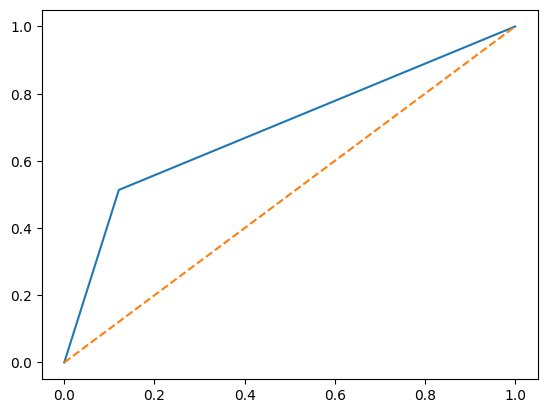

In [83]:
plt.plot(fpr1,tpr1,label=f'Logistic AUC {log_auc:.2f}')
plt.plot([0,1],[0,1] , linestyle='--')

In [103]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Logistic Regression': [log_accuracy, log_precision, log_recall],
    'Decision Tree': [decisionTree_accuracy, decisionTree_precision, desicion_tree_recall]
})

print("Model Comparison:\n")
print(comparison_df)

Model Comparison:

      Metric  Logistic Regression  Decision Tree
0   Accuracy             0.761905       0.709957
1  Precision             0.666667       0.563636
2     Recall             0.513514       0.418919


Model Selection:

I conclude that Logistic Regression have more Accuracy / Precision and Recall,So Logistic Regression performs well
 than Decision Tree.